In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
creditdata = pd.read_csv('crx.data')
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          653 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    int64  
 14  Income          653 non-null    int64  
 15  Approved        653 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 81.8+ KB


In [3]:
# Rubah true false menjadi 1 dan 0 (binary)
creditdata['Employed'] = creditdata['Employed'].map({'t': "1", 'f': "0"})
creditdata.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,1,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,1,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,0,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,1,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,0,0,f,s,120,0,+


In [4]:
# Rubah true false menjadi 1 dan 0 (binary)
creditdata['DriversLicense'] = creditdata['DriversLicense'].map({'t': "1", 'f': "0"})
creditdata.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,1,1,0,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,1,6,0,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,0,0,0,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,1,5,1,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,0,0,0,s,120,0,+


In [5]:
# Rubah + - menjadi 1 dan 0 (binary)
creditdata['Approved'] = creditdata['Approved'].map({'+': "1", '-': "0"})
creditdata.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,1,1,0,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,1,6,0,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,0,0,0,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,1,5,1,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,0,0,0,s,120,0,1


In [6]:
# Split features & target
X = creditdata[['Age','Debt','YearsEmployed','Employed','CreditScore','DriversLicense','Income' ]]
y = creditdata['Approved']

In [7]:
# Split training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test

,Age,Debt,YearsEmployed,Employed,CreditScore,DriversLicense,Income
109,20.67,1.250,1.375,1,3,1,210
274,29.50,0.580,0.290,1,1,0,2803
199,35.42,12.000,14.000,1,8,0,6590
429,20.00,7.000,0.500,0,0,0,0
447,21.92,11.665,0.085,0,0,0,5
...,...,...,...,...,...,...,...
220,22.50,8.460,2.460,0,0,0,0
420,25.92,0.875,0.375,1,2,1,3
381,31.00,2.085,0.085,0,0,0,0
514,36.33,3.790,1.165,0,0,1,0


In [8]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [9]:
scores

{1: 0.6870229007633588,
 2: 0.6717557251908397,
 3: 0.6793893129770993,
 4: 0.7175572519083969,
 5: 0.6870229007633588,
 6: 0.7480916030534351,
 7: 0.7404580152671756,
 8: 0.7404580152671756,
 9: 0.7404580152671756,
 10: 0.7557251908396947,
 11: 0.7709923664122137,
 12: 0.7557251908396947,
 13: 0.7938931297709924,
 14: 0.7862595419847328,
 15: 0.7786259541984732,
 16: 0.7786259541984732,
 17: 0.7938931297709924,
 18: 0.7938931297709924,
 19: 0.7862595419847328,
 20: 0.7557251908396947,
 21: 0.7862595419847328,
 22: 0.7480916030534351,
 23: 0.7709923664122137,
 24: 0.7404580152671756,
 25: 0.732824427480916}

Text(0, 0.5, 'Testing Accuracy')

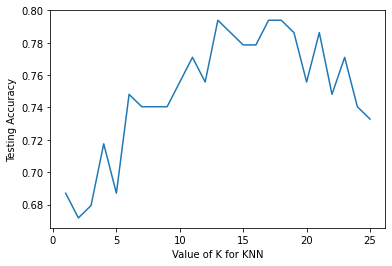

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X,y)

In [11]:
pred = knn.predict(X_test)
pred

array(['0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0'], dtype=object)

In [12]:
acc = accuracy_score(y_test, pred)
acc

0.732824427480916